# Conversion from Draft PDF to DFT File using Artificial Intelligence

## Overview

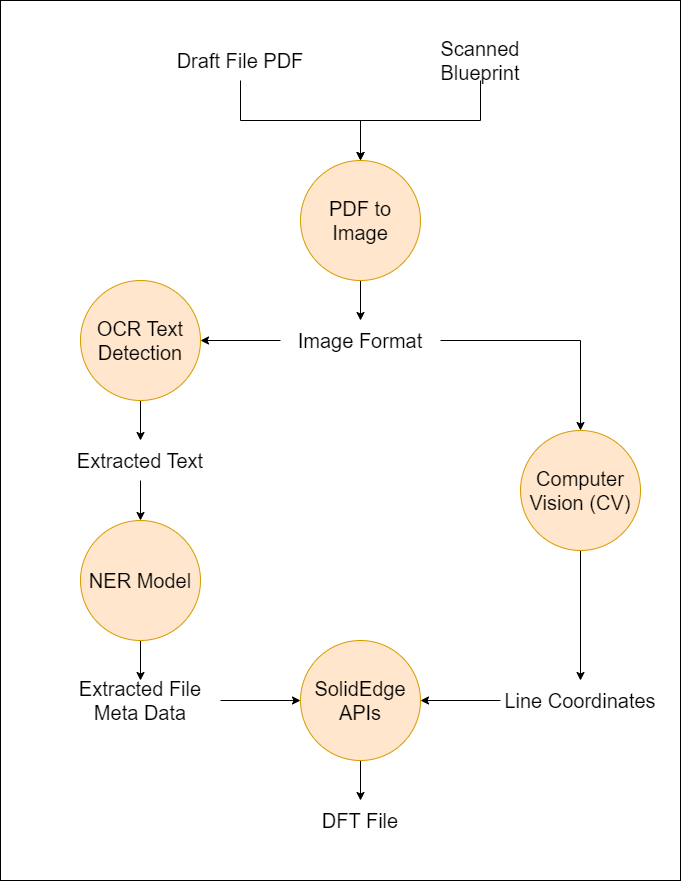

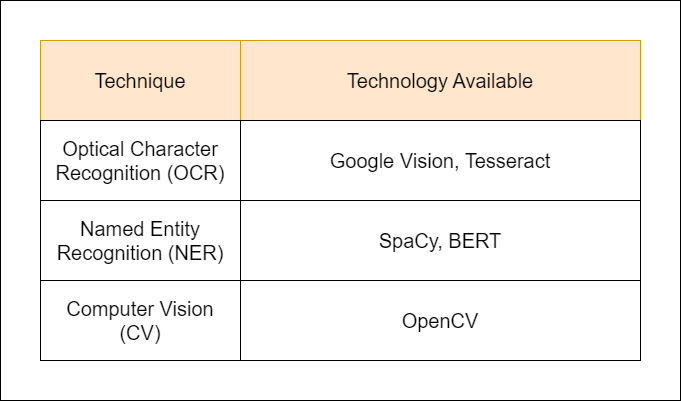

## Setup and installation

Upload the following files
 - box-50-50-50.pdf
 - dulcet-helper-247513-b27e218ef8cb.json

In [ ]:
pdf_file_path = "/content/box-50-50-50.pdf";
img_file_name = "box-50-50-50.png"
google_auth_file_path = "/content/dulcet-helper-247513-b27e218ef8cb.json"
google_vision_response_file_name = 'box-50-50-50.txt'

In [ ]:
!pip3 install pypdfium2

In [ ]:
!pip install --upgrade google-cloud-vision

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = google_auth_file_path

In [ ]:
!gcloud auth activate-service-account draft-ocr-service-account-1@dulcet-helper-247513.iam.gserviceaccount.com --key-file=/content/dulcet-helper-247513-b27e218ef8cb.json

Activated service account credentials for: [draft-ocr-service-account-1@dulcet-helper-247513.iam.gserviceaccount.com]


In [ ]:
!python -m pip uninstall -y spacy
!python -m pip install -U spacy==3.3

In [ ]:
!apt-get install tesseract-ocr

In [ ]:
!pip install pytesseract

## Step 1 - Conversion from PDF to Image

In [ ]:
import pypdfium2 as pdfium

def generate_image_from_pdf(pdf_file_path):
  pdf = pdfium.PdfDocument(pdf_file_path)
  n_pages = len(pdf)
  for page_number in range(n_pages):
      page = pdf.get_page(page_number)
      pil_image = page.render(
          scale=4,
          rotation=0,
          crop=(0, 0, 0, 0)
      ).to_pil()
      pil_image.save(img_file_name)

generate_image_from_pdf(pdf_file_path)

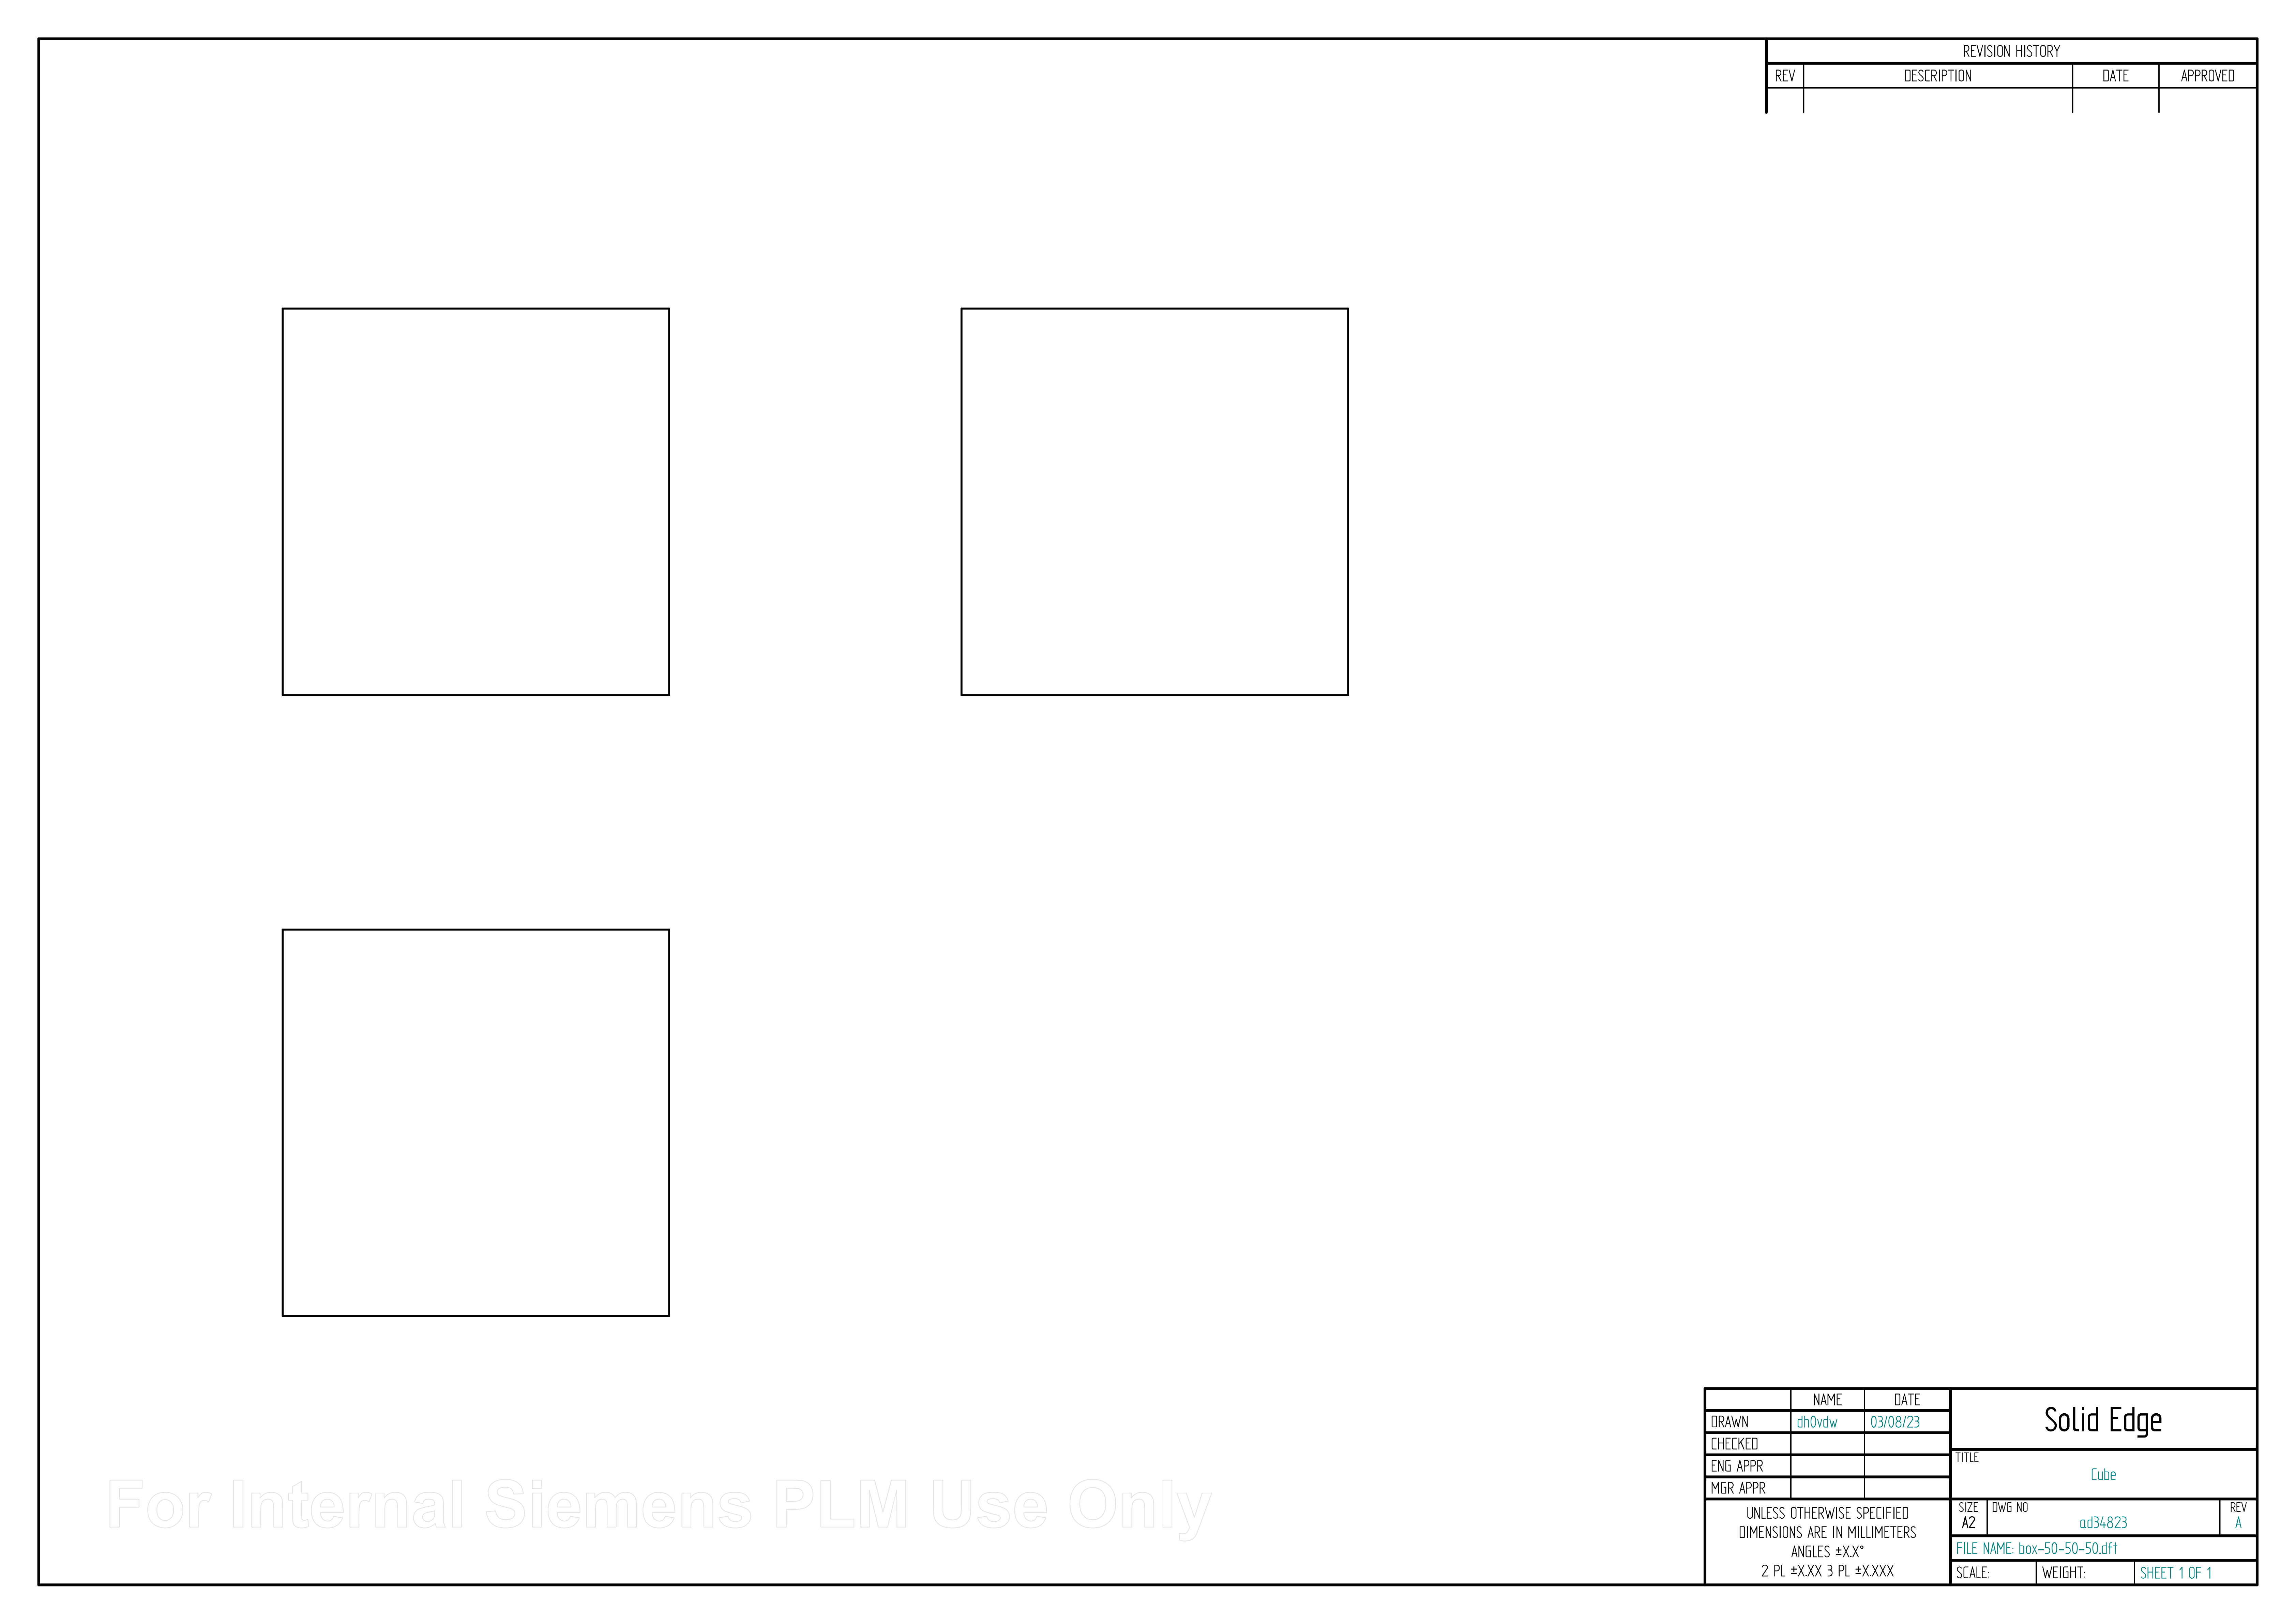

In [ ]:
from IPython.display import Image as IPythonImage

IPythonImage(img_file_name)

## Step 2 - Optical Character Recognition using Google Vision API and Tesseract

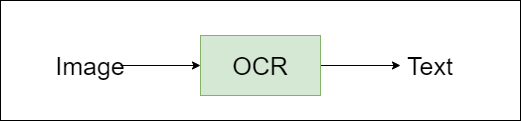

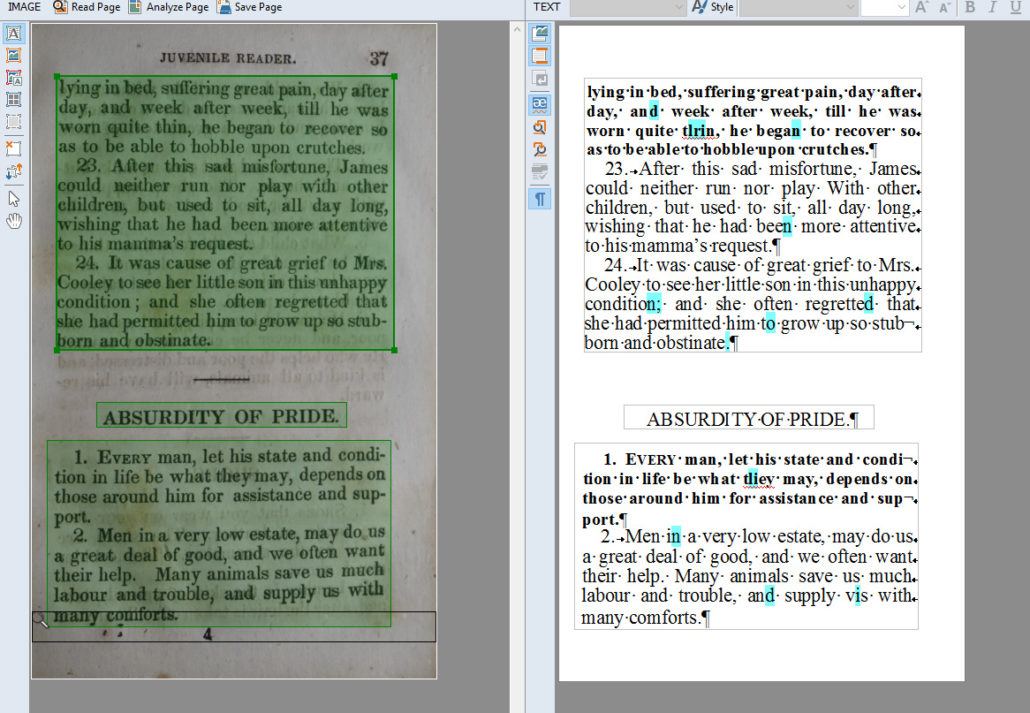

In [ ]:
import io
import os
import pickle
from google.cloud import vision

def get_google_vision_ocr_response(img_file_name):
  client = vision.ImageAnnotatorClient()
  file_name = os.path.abspath(img_file_name)
  with io.open(file_name, 'rb') as image_file:
      content = image_file.read()
  image = vision.Image(content=content)
  response = client.document_text_detection(image=image)
  return response

response = get_google_vision_ocr_response(img_file_name)

In [ ]:
response

text_annotations {
  locale: "en"
  description: "For Internal Siemens PLM Use Only\nDRAWN\nCHECKED\nENG APPR\nMGR APPR\nREV\nDESCRIPTION\nNAME\nDATE\ndhOvdw 03/08/23\nREVISION HISTORY\nUNLESS OTHERWISE SPECIFIED\nDIMENSIONS ARE IN MILLIMETERS\nANGLES +X.X\302\260\n2 PL +XXX 3 PL \302\261X.XXX\nTITLE\nSIZE DWG NO\nA2\nDATE\nSolid Edge\nCube\nad34823\nFILE NAME: box-50-50-50.dft\nSCALE:\nWEIGHT:\nAPPROVED\nSHEET 1 OF 1\nREV\nA"
  bounding_poly {
    vertices {
      x: 314
      y: 130
    }
    vertices {
      x: 6590
      y: 130
    }
    vertices {
      x: 6590
      y: 4628
    }
    vertices {
      x: 314
      y: 4628
    }
  }
}
text_annotations {
  description: "For"
  bounding_poly {
    vertices {
      x: 315
      y: 4328
    }
    vertices {
      x: 628
      y: 4329
    }
    vertices {
      x: 628
      y: 4497
    }
    vertices {
      x: 315
      y: 4496
    }
  }
}
text_annotations {
  description: "Internal"
  bounding_poly {
    vertices {
      x: 679
      

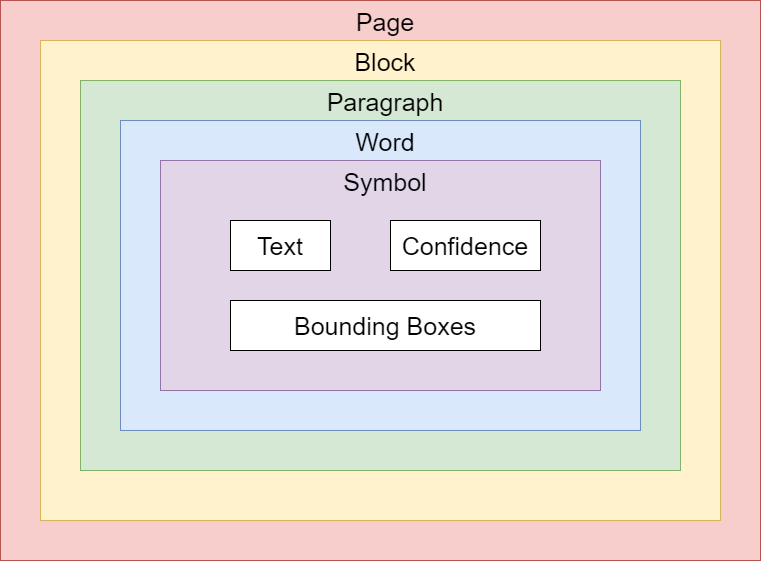

In [ ]:
raw_text = response.text_annotations[0].description
print(raw_text)

For Internal Siemens PLM Use Only
DRAWN
CHECKED
ENG APPR
MGR APPR
REV
DESCRIPTION
NAME
DATE
dhOvdw 03/08/23
REVISION HISTORY
UNLESS OTHERWISE SPECIFIED
DIMENSIONS ARE IN MILLIMETERS
ANGLES +X.X°
2 PL +XXX 3 PL ±X.XXX
TITLE
SIZE DWG NO
A2
DATE
Solid Edge
Cube
ad34823
FILE NAME: box-50-50-50.dft
SCALE:
WEIGHT:
APPROVED
SHEET 1 OF 1
REV
A


In [ ]:
raw_text

'For Internal Siemens PLM Use Only\nDRAWN\nCHECKED\nENG APPR\nMGR APPR\nREV\nDESCRIPTION\nNAME\nDATE\ndhOvdw 03/08/23\nREVISION HISTORY\nUNLESS OTHERWISE SPECIFIED\nDIMENSIONS ARE IN MILLIMETERS\nANGLES +X.X°\n2 PL +XXX 3 PL ±X.XXX\nTITLE\nSIZE DWG NO\nA2\nDATE\nSolid Edge\nCube\nad34823\nFILE NAME: box-50-50-50.dft\nSCALE:\nWEIGHT:\nAPPROVED\nSHEET 1 OF 1\nREV\nA'

In [ ]:
import pickle

with open(google_vision_response_file_name, 'wb') as f:
  pickle.dump(response,f) 

In [ ]:
from PIL import Image
import pytesseract
print(pytesseract.image_to_string(Image.open('/content/box-50-50-50.png')))

REVISION HISTORY

eve Tare |

Solid Edge
ceca PT

eng ape cube

MGRAPPR | ST
SIONS fae N MLE
DIMENSIONS ARE IN MILLIMETERS A2 0d34823 ‘
ANGLES #XX° FILE NAME: box-50-50-50.dft
2 PL EXXX 3 PL EXXXX STALE WEIGHT SEO

 



In [ ]:
from PIL import Image
import pytesseract
print(pytesseract.image_to_string(Image.open('/content/box-50-50-50 - meta-data-table-only.png')))

ve} tare .

Solid Edge
a a

eNcaPeR fT Cube

ri ec
SIONS fae N MLE
DIMENSIONS ARE IN MILLIMETERS Az ad34823
ANGLES #XX° FILE NAME: box-50-50-50.d¢t
2 PL #XXX 3 PL #XXXX STALE WEIGHT SEO

 



## Step 3 - Named Entity Recognition using Spacy

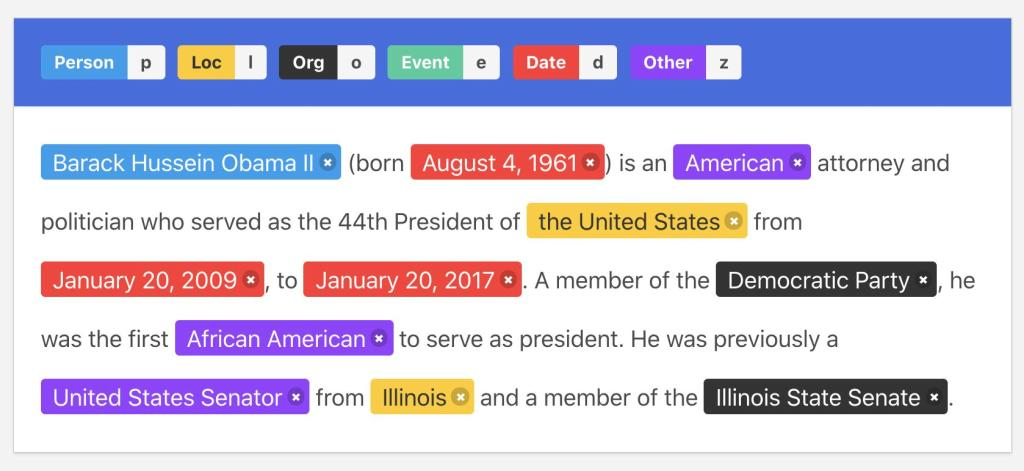

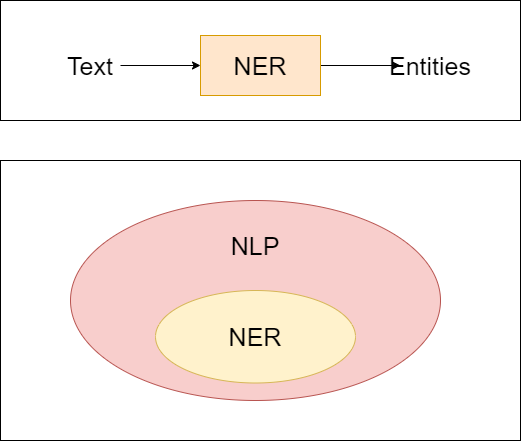

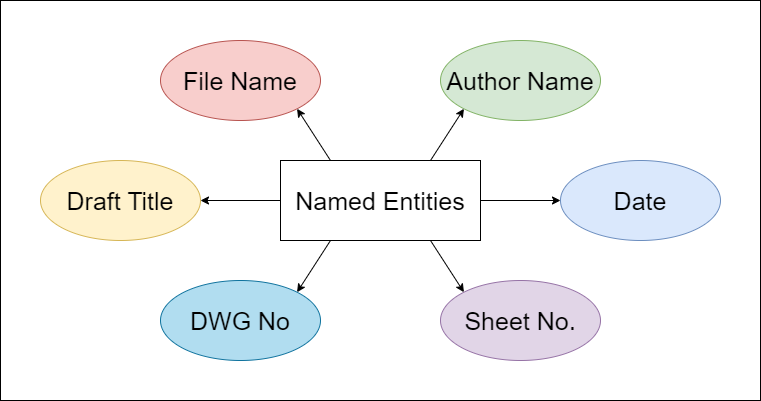

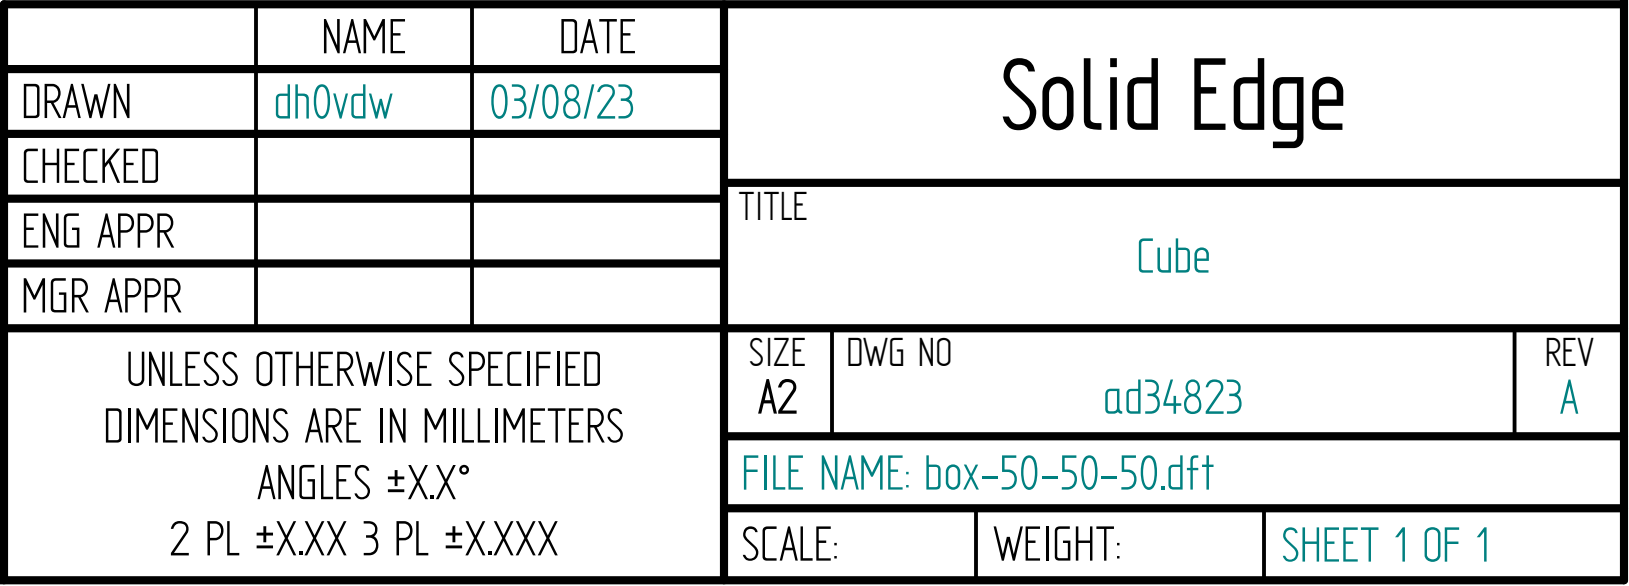

In [ ]:
#!cp /content/drive/MyDrive/DraftOCRData/SpacyNERModel/model-best/content/model-best /content -r

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
nlp_ner = spacy.load("model-best")

In [ ]:
doc = nlp_ner(raw_text)

colors = {
  "FILE_NAME": "#ff0000",
  "AUTHOR_NAME": "#00ff00",
  "DATE":"#0000ff",
  "DRAFT_TITLE": "#ffff00",
  "DWG_NO": "#00ffff",
  "SHEET_NUMBER":"#ff00ff"
}
options = {"colors": colors} 

spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

In [ ]:
extracted_meta_data = {}
for ent in doc.ents:
  extracted_meta_data[ent.label_] = str(ent)
extracted_meta_data

{'AUTHOR_NAME': 'dhOvdw',
 'DATE': '03/08/23',
 'DRAFT_TITLE': 'Cube',
 'DWG_NO': 'ad34823',
 'FILE_NAME': 'box-50-50-50.dft',
 'SHEET_NUMBER': 'SHEET 1 OF 1'}

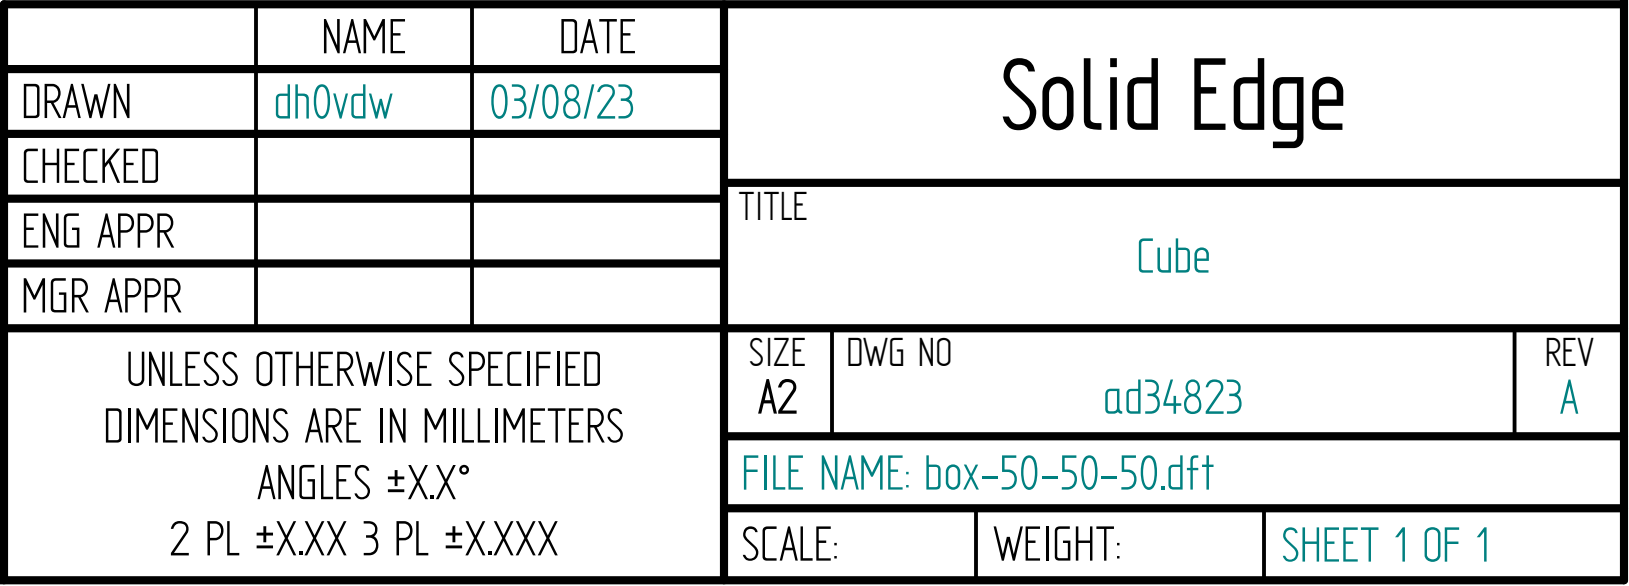

## Step 4 - Line Detection Using Open CV

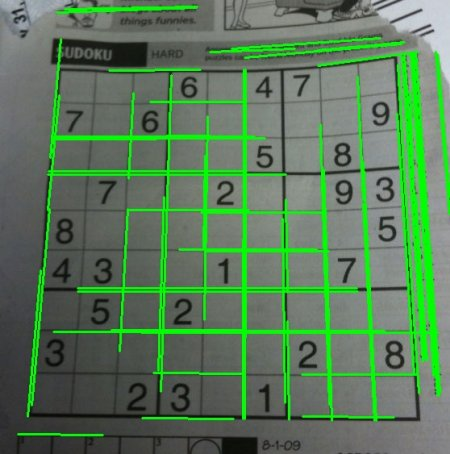

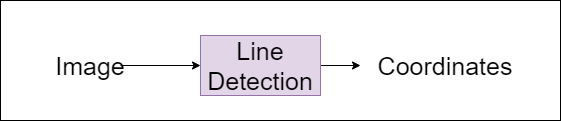

In [ ]:
import cv2

def mask_tables_manually(img_file_name):
  image = cv2.imread(img_file_name)
  image[119:119+214, 5177:5177+1442] = (255,255,255)
  image[4063:4063+583, 4993:4993+1625] = (255,255,255)
  cv2.imwrite('draft_tables_removed.jpg',image)
  IPythonImage('draft_tables_removed.jpg')

mask_tables_manually(img_file_name)

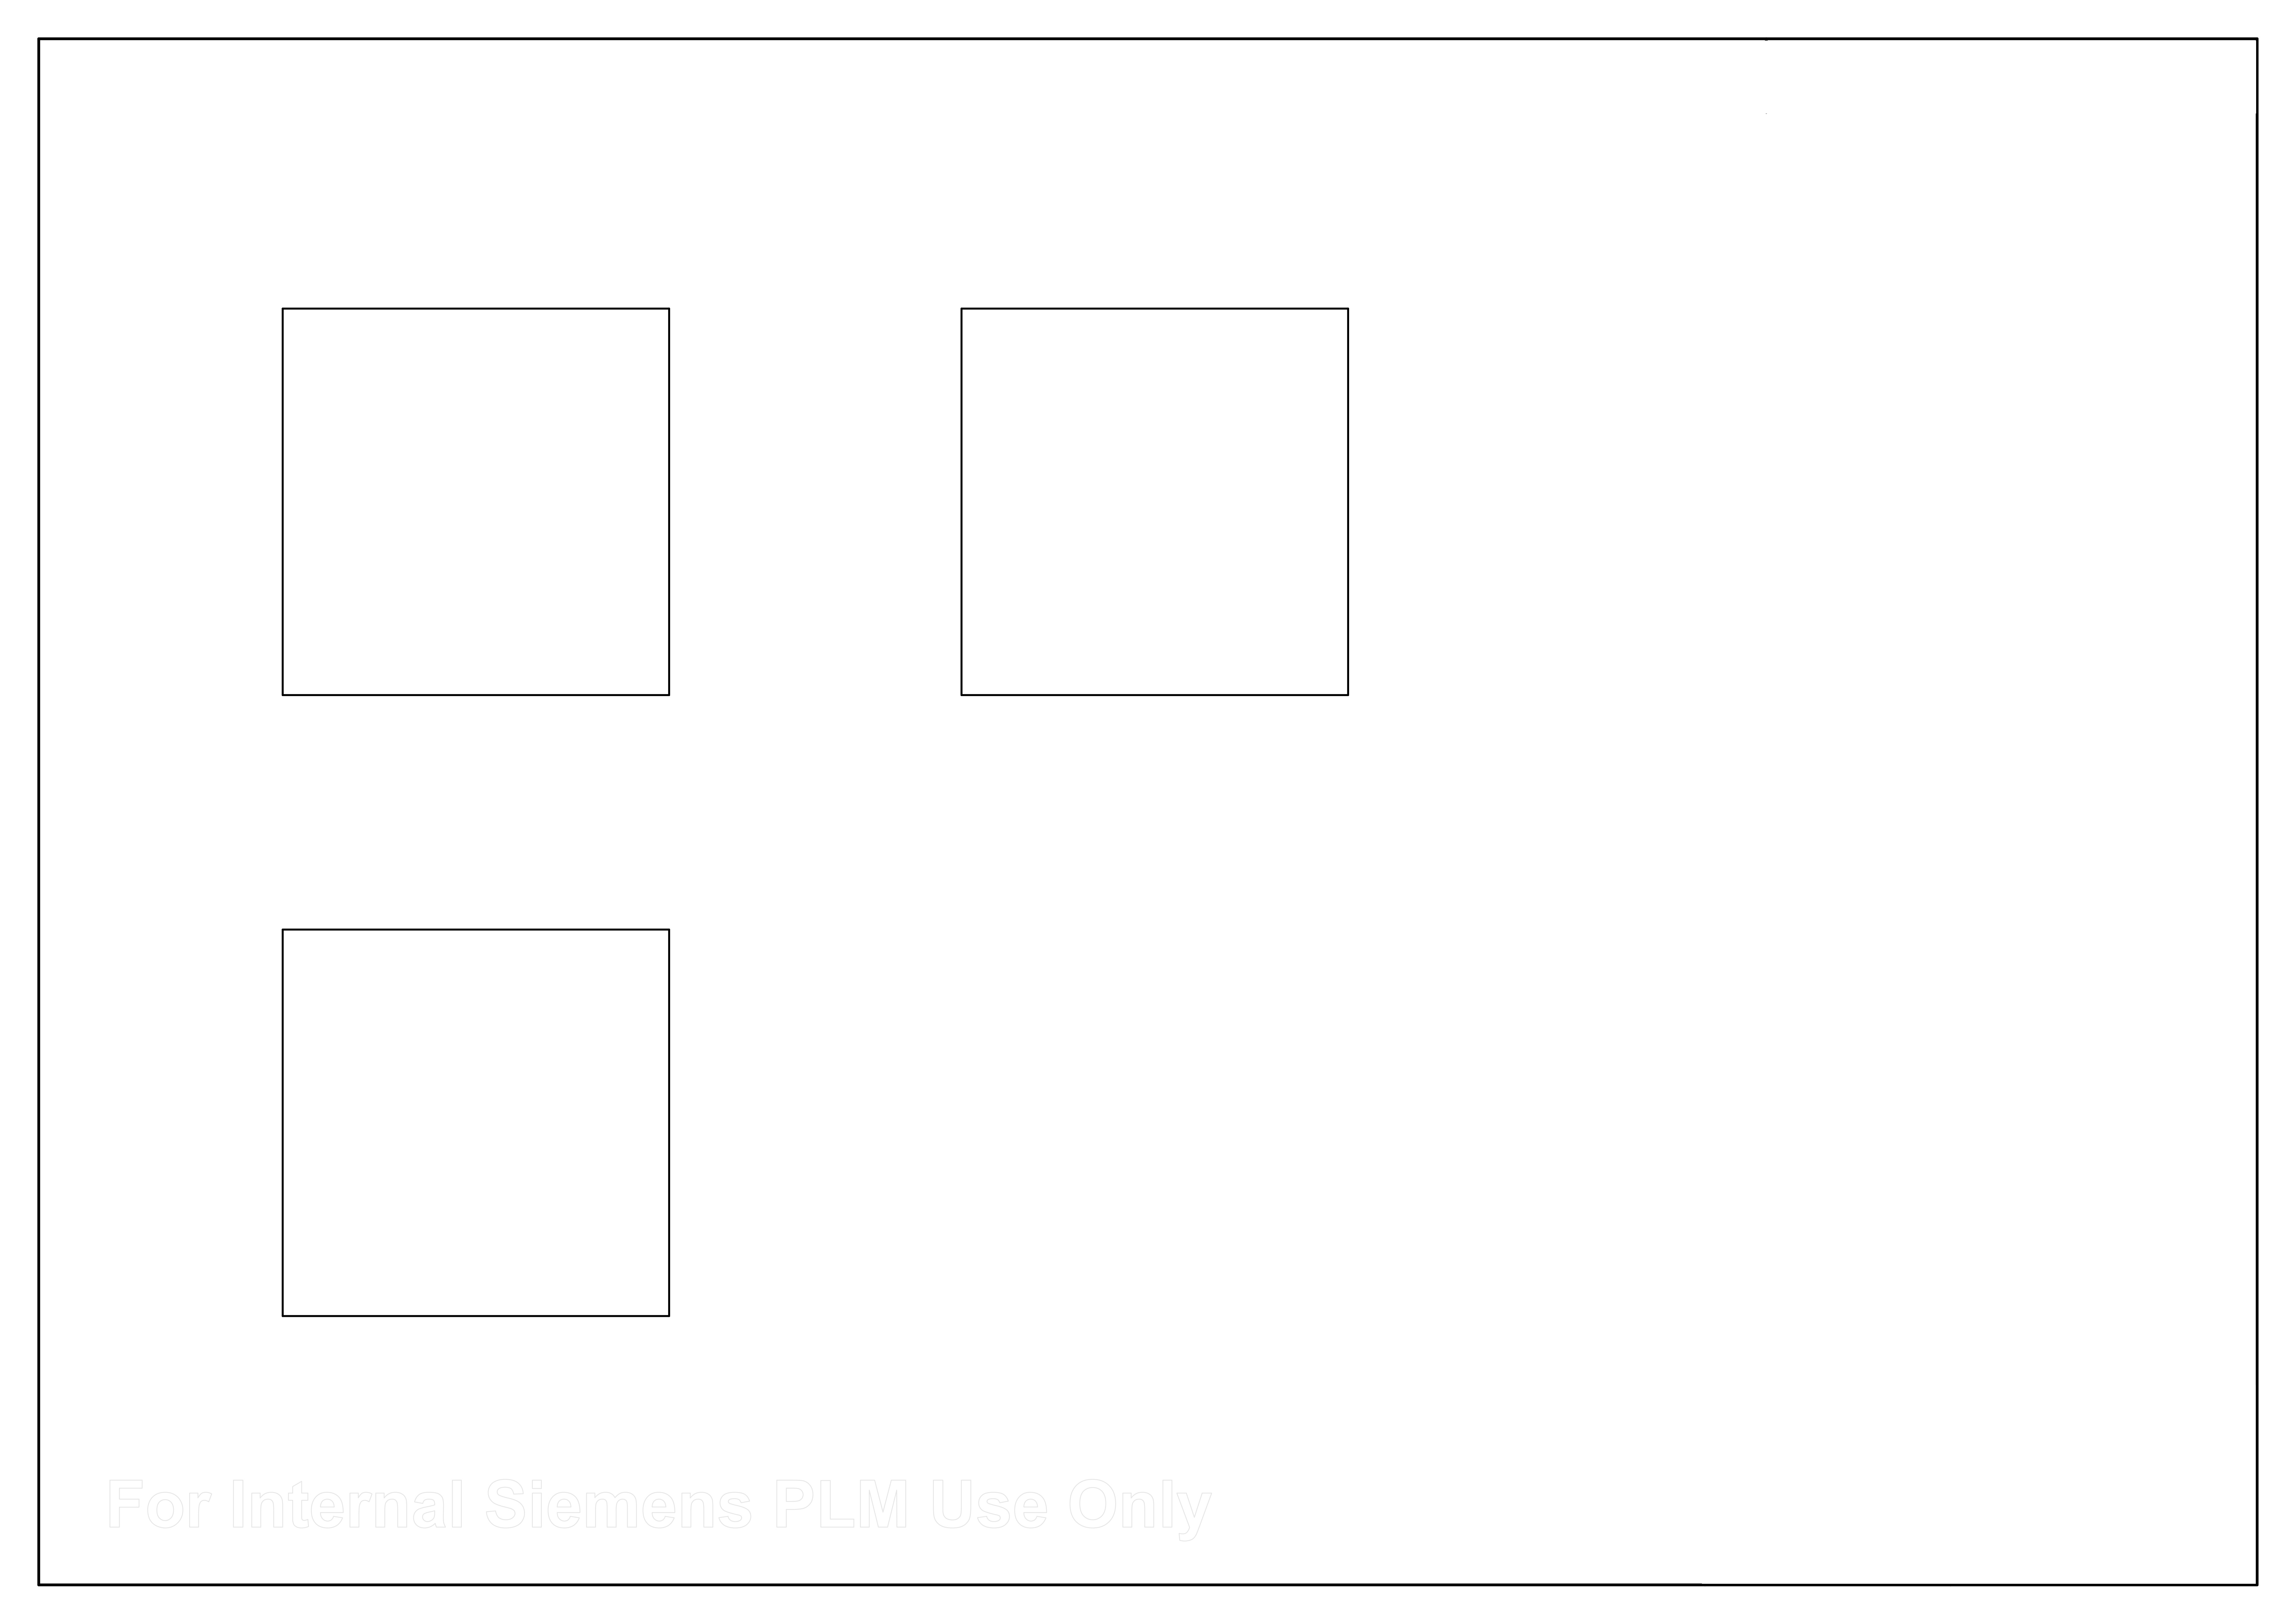

In [ ]:
IPythonImage('draft_tables_removed.jpg')

In [ ]:
def detect_lines(imageFileName):
  import cv2 as cv
  import numpy as np
  img = cv.imread(imageFileName)
  edges = cv.Canny(img,50,150,apertureSize = 3)
  lines = cv.HoughLinesP(edges,1,np.pi/180,100,minLineLength=300,maxLineGap=10)
  extracted_lines = []
  for line in lines:
    extracted_lines.append(line[0])
    x1,y1,x2,y2 = line[0]
    cv.line(img,(x1,y1),(x2,y2),(0,255,0),2)
  cv.imwrite('draft_detected_lines.jpg',img)
  return extracted_lines

extracted_lines = detect_lines('draft_tables_removed.jpg')
extracted_lines

[array([ 111, 4653, 6623, 4653], dtype=int32),
 array([ 109,  117, 6626,  117], dtype=int32),
 array([ 109, 4645, 6626, 4645], dtype=int32),
 array([ 112,  109, 6623,  109], dtype=int32),
 array([ 109, 4651,  109,  111], dtype=int32),
 array([6617, 4644, 6617,  334], dtype=int32),
 array([ 117, 4643,  117,  119], dtype=int32),
 array([6626, 4649, 6626,  113], dtype=int32),
 array([1960, 2041, 1960,  902], dtype=int32),
 array([1966, 3859, 1966, 2727], dtype=int32),
 array([ 826,  908, 1965,  908], dtype=int32),
 array([ 826, 2036, 1966, 2036], dtype=int32),
 array([ 832, 2041,  832,  902], dtype=int32),
 array([ 826, 2040,  826,  903], dtype=int32),
 array([2819,  902, 3956,  902], dtype=int32),
 array([ 827, 2041, 1965, 2041], dtype=int32),
 array([2823, 2041, 2823,  908], dtype=int32),
 array([ 827, 3863, 1964, 3863], dtype=int32),
 array([ 826, 2729, 1958, 2729], dtype=int32),
 array([ 830, 2723, 1962, 2723], dtype=int32),
 array([3957, 2041, 3957,  903], dtype=int32),
 array([3952,

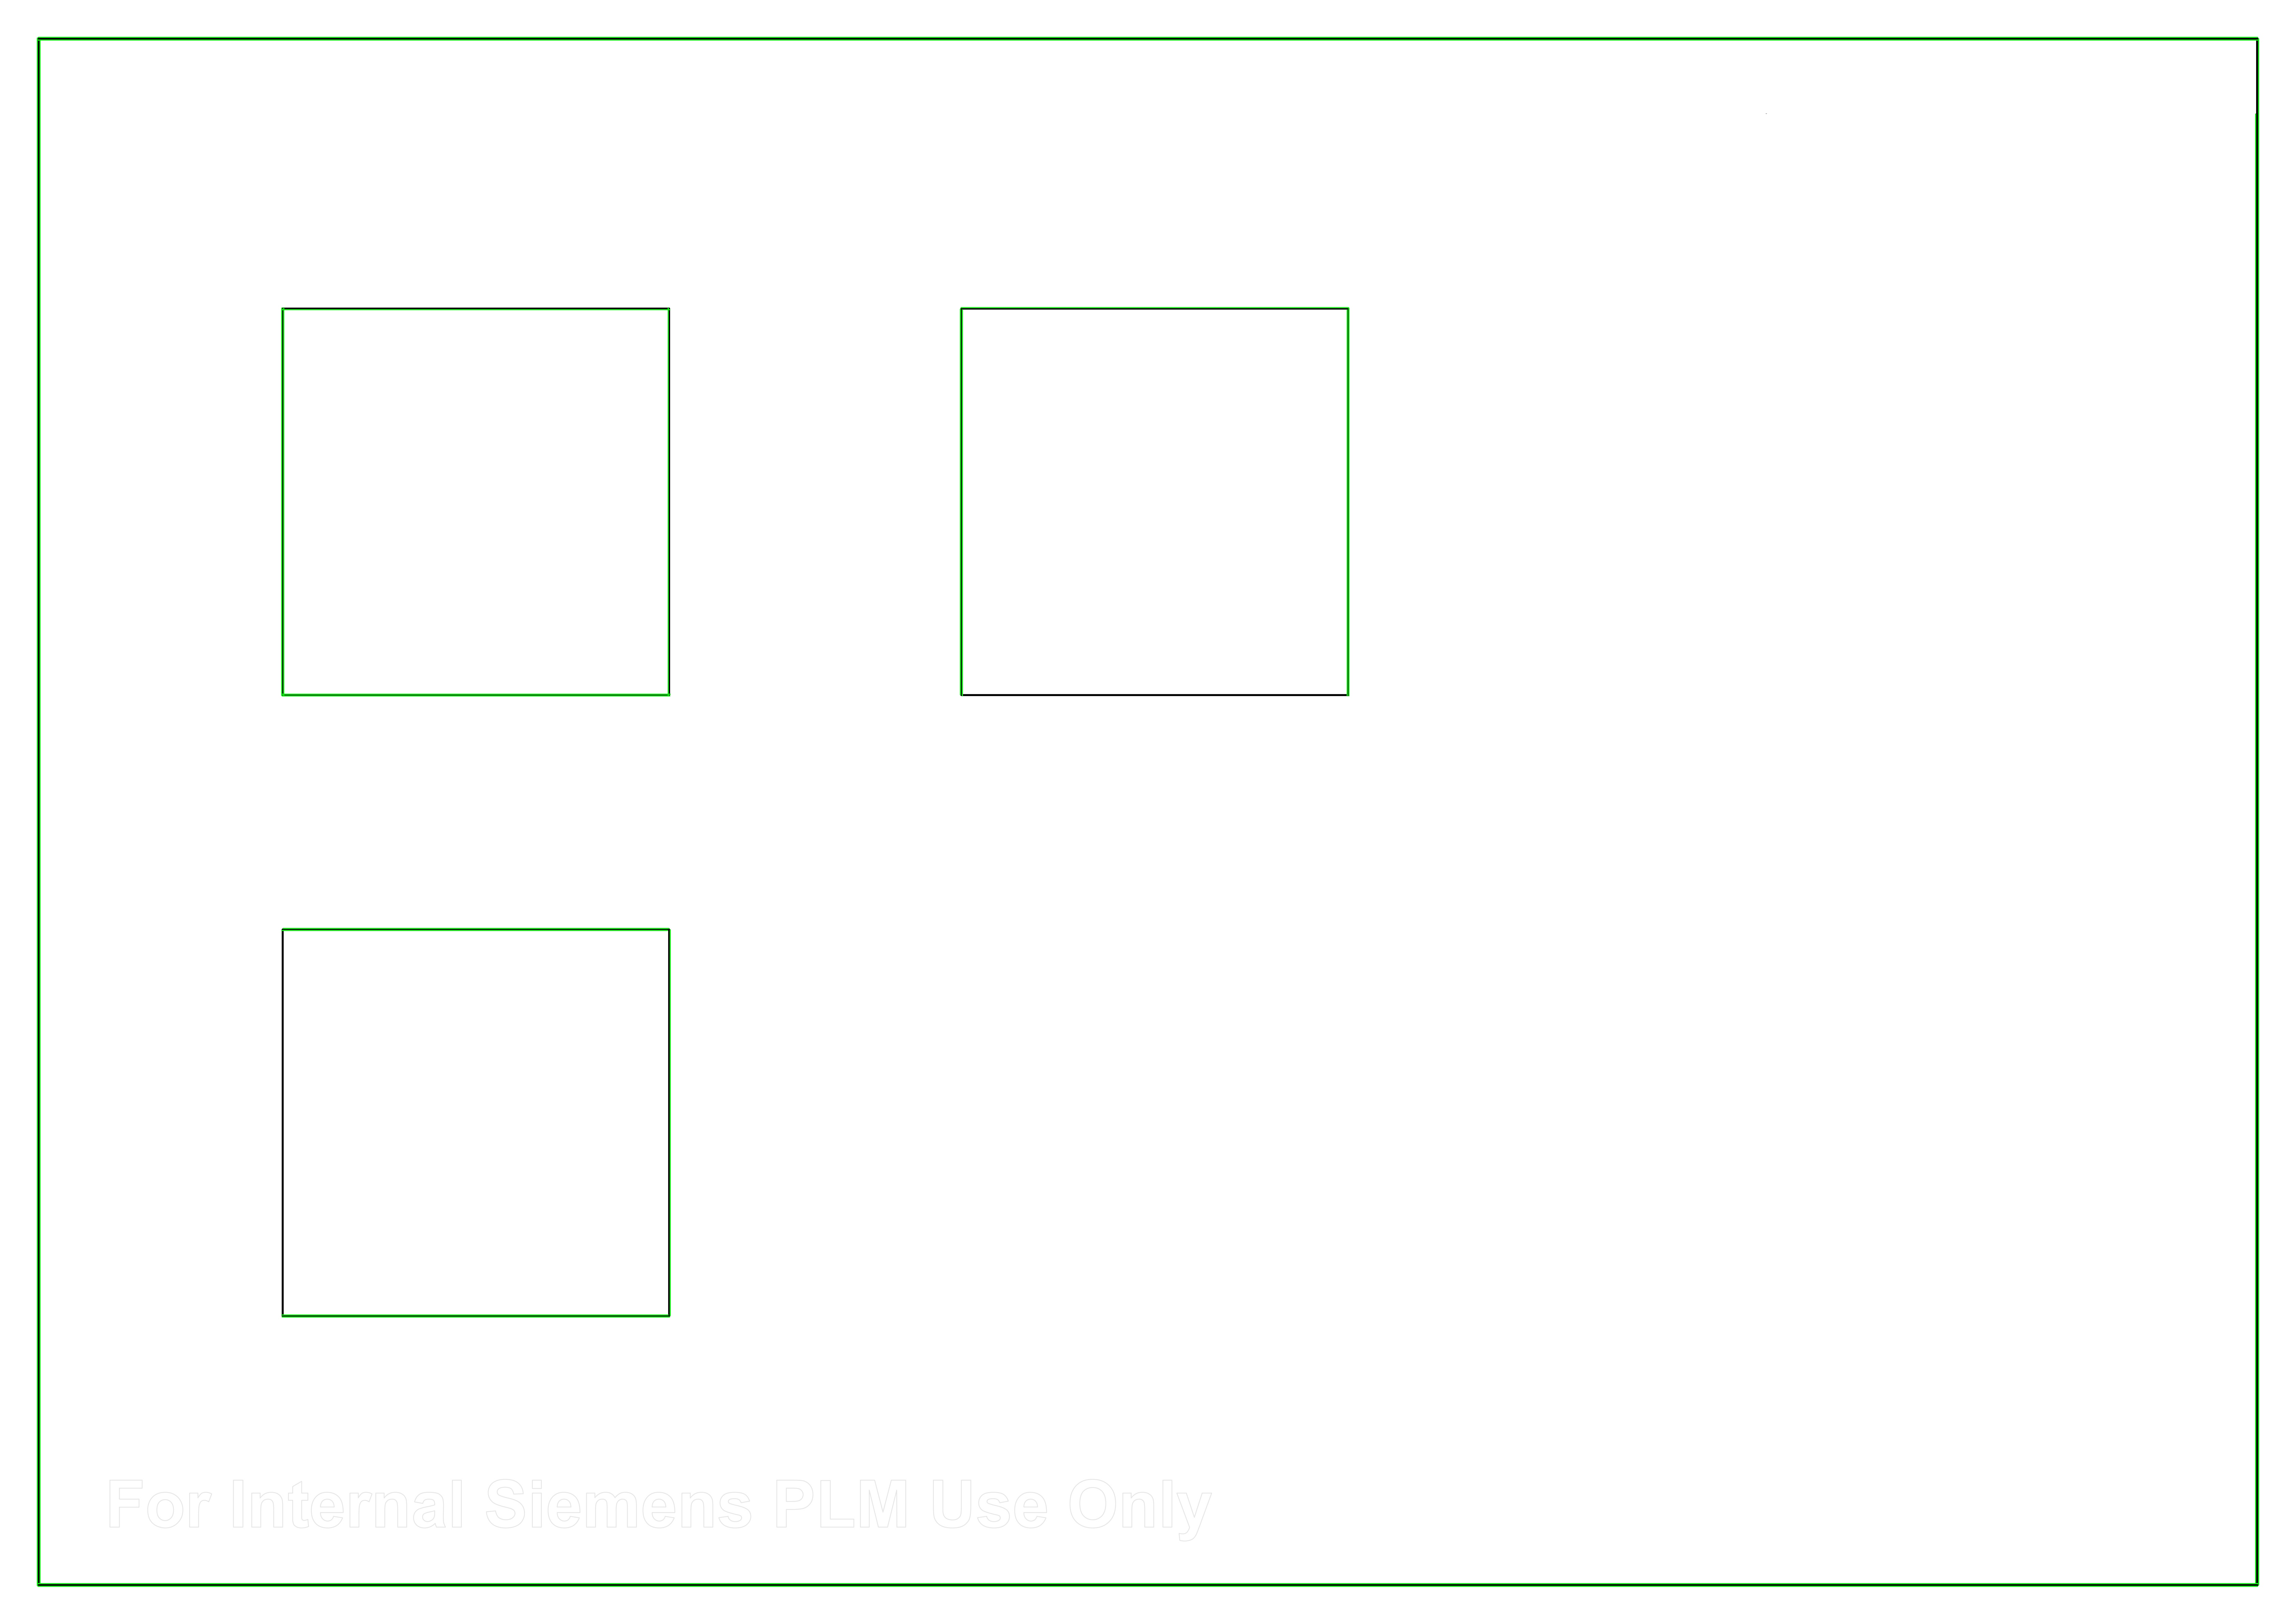

In [ ]:
IPythonImage('draft_detected_lines.jpg')

In [ ]:
import cv2

def get_image_shape(img_file_name):
  img = cv2.imread(img_file_name)
  return img.shape

image_shape = get_image_shape(img_file_name)
image_resolution = [ image_shape[0], image_shape[1] ]
image_resolution

[4764, 6736]

## Step 5 - Final Response

In [ ]:
final_response = {}

In [ ]:
final_response['image_resolution'] = image_resolution

In [ ]:
final_response['line_coordinates'] = extracted_lines

In [ ]:
final_response['file_meta_data'] = extracted_meta_data

In [ ]:
final_response

{'image_resolution': [4764, 6736],
 'line_coordinates': [array([ 111, 4653, 6623, 4653], dtype=int32),
  array([ 109,  117, 6626,  117], dtype=int32),
  array([ 109, 4645, 6626, 4645], dtype=int32),
  array([ 112,  109, 6623,  109], dtype=int32),
  array([ 109, 4651,  109,  111], dtype=int32),
  array([6617, 4644, 6617,  334], dtype=int32),
  array([ 117, 4643,  117,  119], dtype=int32),
  array([6626, 4649, 6626,  113], dtype=int32),
  array([1960, 2041, 1960,  902], dtype=int32),
  array([1966, 3859, 1966, 2727], dtype=int32),
  array([ 826,  908, 1965,  908], dtype=int32),
  array([ 826, 2036, 1966, 2036], dtype=int32),
  array([ 832, 2041,  832,  902], dtype=int32),
  array([ 826, 2040,  826,  903], dtype=int32),
  array([2819,  902, 3956,  902], dtype=int32),
  array([ 827, 2041, 1965, 2041], dtype=int32),
  array([2823, 2041, 2823,  908], dtype=int32),
  array([ 827, 3863, 1964, 3863], dtype=int32),
  array([ 826, 2729, 1958, 2729], dtype=int32),
  array([ 830, 2723, 1962, 2723],

# Future Scope

- arcs and ellipses
- dimensions
- multiple sheet files
- "save as pdf" option
- Techsoft tool for reading pdfs
- ODA/Taiga